<h3>Summary

Records of inpatient and outpatient claims from 138,556 Medicare beneficiaries are analyzed to identify healthcare providers who potentially committed fraud. Detailed claim data as well as beneficiaries' demographic and medical history data are available. 

<h3>1. Introduction:

Healthcare provider fraud is one of the biggest problems facing Medicare, and it contributes to the total Medicare spending growth. Healthcare fraud is an organized crime which involves peers of providers, physicians, beneficiaries acting together to make fraudulent claims.
Rigorous analysis of Medicare data has yielded many physicians who indulge in fraud. They adopt ways in which an ambiguous diagnosis code is used to adopt costliest procedures and drugs. Insurance companies are the most vulnerable institutions impacted. To recoup those losses, insurance companies increase the insurance premiums and as a result healthcare becomes more costly for everyone.
Healthcare fraud and abuse take many forms. Some of the most common types of fraud by providers are: a) Billing for services that were not provided; b) Duplicate submission of a claim for the same service; c) Misrepresenting the service provided; d) Charging for a more complex or expensive service than was actually provided; e) Billing for a covered service when the service actually provided was not covered.

Problem Statement: 
 
We want to identify the potentially fraudulent providers based on the claims that they filed. In addition, we will also discover important variables helpful in detecting the behaviour of those providers. Further, we will study fraudulent patterns in the provider's claims to understand the future behaviour of providers.



Datasets:

The datasets include provider data, beneficiary data, inpatient claims data and outpatient claims data. There are separate training dataset and test dataset.It can be found here : https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis

The training provider data include 5410 providers with a binary flag for potential fraud. The training beneficiary data contains 138,556 subjects with 25 variables. The inpatient training data include 31,289 subjects and 40,474 claims with 30 variables. The outpatient training data include 133,980 subjects and 517,737 claims with 27 variables. The test provider data include 1353 providers. The test beneficiary data contains 63,968 subjects. The inpatient test data include 8,351 subjects and 9,551 claims. The outpatient test data include 59,608 subjects and 125,841 claims. 

The beneficiary data variables include ID, date of birth, gender, race, state, county and chronic disease status, inpatient annual reimbursement and deductible amount, and outpatient annual reimbursement and deductible amount. The inpatient dataset variables include beneficiary ID, claim id, claim start/end date, provider, reimbursement amount, admission date, admit diagnosis code,  deductible amount, discharge date, diagnosis code and procedure code. The outpatient dataset variables include beneficiary ID, claim id, claim start/end date, provider, reimbursement amount, admit diagnosis code, deductible amount, diagnosis code, and procedure code. 


Questions of interest:

We will first use the training datasets to identify differential features attributable to potentially fraudulent providers. The following questions will guide the exploratory data analysis:<br>
1) What is the difference in the number of claims submitted annually between the fraudulent providers and the "honest" providers? <br>
2) What is the difference in the number of procedures per visit?<br>
3) What is the difference in the distribution of diagnosis?<br>
4) What is the relationship between the diagnosis and the procedure? 


<h3> 2. Data wrangling 

In [2]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

#display plots inline
%matplotlib inline

In [55]:
#import the raw datasets
fraud_tr = pd.read_csv('/Users/zhengzhang/Downloads/healthcare-provider-fraud-detection-analysis/Train-1542865627584.csv')
bene_tr = pd.read_csv('/Users/zhengzhang/Downloads/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv')
inpatient_tr = pd.read_csv('/Users/zhengzhang/Downloads/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv')
outpatient_tr = pd.read_csv('/Users/zhengzhang/Downloads/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv')

In [5]:
#insepct the datasets
fraud_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
Provider          5410 non-null object
PotentialFraud    5410 non-null object
dtypes: object(2)
memory usage: 84.7+ KB


In [6]:
fraud_tr.head()

Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No

In [7]:
#view count of null values
fraud_tr.isnull().sum()

Provider          0
PotentialFraud    0
dtype: int64

In [8]:
bene_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
BeneID                             138556 non-null object
DOB                                138556 non-null object
DOD                                1421 non-null object
Gender                             138556 non-null int64
Race                               138556 non-null int64
RenalDiseaseIndicator              138556 non-null object
State                              138556 non-null int64
County                             138556 non-null int64
NoOfMonths_PartACov                138556 non-null int64
NoOfMonths_PartBCov                138556 non-null int64
ChronicCond_Alzheimer              138556 non-null int64
ChronicCond_Heartfailure           138556 non-null int64
ChronicCond_KidneyDisease          138556 non-null int64
ChronicCond_Cancer                 138556 non-null int64
ChronicCond_ObstrPulmonary         138556 non-null int64
ChronicCond_Depression          

In [9]:
bene_tr.head()

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       2                     2                          2   
2                       2                     2                          1   
3                       2                     1                          1   
4                       2                     1                          2   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         2                                1   
1                         2                                2   
2                         2                                2   
3                         1                                1   
4                         2                                2   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   2                         0                      0   
2                   2                         0                      0   
3                   2                         0                      0   
4                   2                         0                      0   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
0                        60                     70  
1                        30                     50  
2                        90                     40  
3                      1810                    760  
4                      1790                   1200  

[5 rows x 25 columns]

In [10]:
bene_tr.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [11]:
inpatient_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
BeneID                    40474 non-null object
ClaimID                   40474 non-null object
ClaimStartDt              40474 non-null object
ClaimEndDt                40474 non-null object
Provider                  40474 non-null object
InscClaimAmtReimbursed    40474 non-null int64
AttendingPhysician        40362 non-null object
OperatingPhysician        23830 non-null object
OtherPhysician            4690 non-null object
AdmissionDt               40474 non-null object
ClmAdmitDiagnosisCode     40474 non-null object
DeductibleAmtPaid         39575 non-null float64
DischargeDt               40474 non-null object
DiagnosisGroupCode        40474 non-null object
ClmDiagnosisCode_1        40474 non-null object
ClmDiagnosisCode_2        40248 non-null object
ClmDiagnosisCode_3        39798 non-null object
ClmDiagnosisCode_4        38940 non-null object
ClmDiagnosisCode_5        37

In [12]:
inpatient_tr.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_7  ClmDiagnosisCode_8  \
0            NaN  2009-04-12  ...               2724               19889   
1            NaN  2009-08-31  ...                NaN                 NaN   
2      PHY324689  2009-09-17  ...                NaN                 NaN   
3      PHY349768  2009-02-14  ...              25062               40390   
4            NaN  2009-08-13  ...               5119               29620   

  ClmDiagnosisCode_9 ClmDiagnosisCode_10 ClmProcedureCode_1  \
0               5849                 NaN                NaN   
1                NaN                 NaN             7092.0   
2                NaN                 NaN                NaN   
3               4019                 NaN              331.0   
4              20300                 NaN             3893.0   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 30 columns]

In [13]:
inpatient_tr.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [14]:
outpatient_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
BeneID                    517737 non-null object
ClaimID                   517737 non-null object
ClaimStartDt              517737 non-null object
ClaimEndDt                517737 non-null object
Provider                  517737 non-null object
InscClaimAmtReimbursed    517737 non-null int64
AttendingPhysician        516341 non-null object
OperatingPhysician        90617 non-null object
OtherPhysician            195046 non-null object
ClmDiagnosisCode_1        507284 non-null object
ClmDiagnosisCode_2        322357 non-null object
ClmDiagnosisCode_3        203257 non-null object
ClmDiagnosisCode_4        125596 non-null object
ClmDiagnosisCode_5        74344 non-null object
ClmDiagnosisCode_6        48756 non-null object
ClmDiagnosisCode_7        32961 non-null object
ClmDiagnosisCode_8        22912 non-null object
ClmDiagnosisCode_9        14838 non-null object
ClmDiagnosisCo

In [15]:
outpatient_tr.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmDiagnosisCode_9  \
0            NaN              78943  ...                NaN   
1            NaN               6115  ...                NaN   
2            NaN               2723  ...                NaN   
3            NaN              71988  ...                NaN   
4            NaN              82382  ...                NaN   

  ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
0                 NaN                NaN                NaN   
1                 NaN                NaN                NaN   
2                 NaN                NaN                NaN   
3                 NaN                NaN                NaN   
4                 NaN                NaN                NaN   

  ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  DeductibleAmtPaid  ClmAdmitDiagnosisCode  
0                 0                  56409  
1                 0                  79380  
2                 0                    NaN  
3                 0                    NaN  
4                 0                  71947  

[5 rows x 27 columns]

In [16]:
outpatient_tr.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

<h4> 2a. Handling null values 

1) Provider data (Fraud_tr): No missing data. <br>
2) Beneficiary data (Bene_tr): One variable (date of death) has 1421 non-missing data, which is expected. <br>
3) Inpatient claim data (inpatient_tr): Missing data were observed on physician ID and diagnosis/procedure code variables, we decide to leave as they were. Missing data were found on the variable (deductible amount paid) on 899 claims, we assumed deductible = 0 for those claims. <br>
4) Outpatient claim data (outpatient_tr): Missing data were observed on physician ID and diagnosis/procedure/admit diagnosis code variables, we decide to leave as they were. <br>


In [21]:
#Fill the missing values with 0
inpatient_tr['DeductibleAmtPaid'].fillna(0,inplace=True)
#check whether the missing values are replaced with 0
inpatient_tr.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid             0
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

<h4> 3. Exploratory data analysis

<h5> 3a. Univariate Analysis

Target variable: Potential Fraud <br>
Question: What percent of providers are potential fraud?<br>
Answer: 506/5410(9.4%) are potential fraud. 

In [28]:
fraud_tr['PotentialFraud'].value_counts()


No     4904
Yes     506
Name: PotentialFraud, dtype: int64

In [29]:
fraud_tr['PotentialFraud'].value_counts(normalize=True)

No     0.90647
Yes    0.09353
Name: PotentialFraud, dtype: float64

Investigate the demographics of beneficiaries<br>
Findings:<br>
1. Gender: 43% are men<br>
2. Race: 84% whilte, will be dichotomized for further analysis<br>
3. Renal Disease: 14% <br>
4. From 52 states and 314 counties<br>
5. Baseline medical condition:<br>
a. Alzheimer: 33.2%<br>
b. Heart failure: 49.4%<br>
c. Kidney disease: 31.2%<br>
d. Cancer: 12.0%<br>
e. Obstructive-Pulmonary: 23.7%<br>
f. Depression: 35.6%<br>
g. Diabetes: 39.8%<br>
h. Ischemic heart disease: 32.4%<br>
i. Osteoporasis: 27.5%<br>
j. Rheumatoidarthritis: 25.7%<br>
k. Stroke: 7.9%


In [30]:
bene_tr['Gender'].value_counts()

2    79106
1    59450
Name: Gender, dtype: int64

In [31]:
bene_tr['Gender'].value_counts(normalize=True)

2    0.570932
1    0.429068
Name: Gender, dtype: float64

In [22]:
bene_tr['Race'].value_counts()

1    117057
2     13538
3      5059
5      2902
Name: Race, dtype: int64

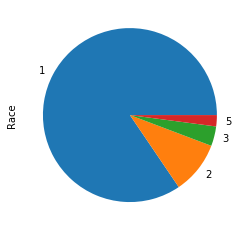

In [51]:
bene_tr['Race'].value_counts(normalize=True).plot(kind="pie")

In [32]:
bene_tr['Race'].value_counts(normalize=True)

1    0.844835
2    0.097708
3    0.036512
5    0.020945
Name: Race, dtype: float64

In [23]:
bene_tr['RenalDiseaseIndicator'].value_counts()

0    118978
Y     19578
Name: RenalDiseaseIndicator, dtype: int64

In [34]:
bene_tr['RenalDiseaseIndicator'].value_counts(normalize=True)

0    0.8587
Y    0.1413
Name: RenalDiseaseIndicator, dtype: float64

In [37]:
bene_tr['State'].value_counts().describe()

count       52.000000
mean      2664.538462
std       2601.694384
min        196.000000
25%        826.250000
50%       1871.500000
75%       3327.000000
max      12052.000000
Name: State, dtype: float64

In [38]:
bene_tr['County'].value_counts().describe()

count     314.000000
mean      441.261146
std       754.873323
min         1.000000
25%         8.000000
50%        30.000000
75%       621.500000
max      3943.000000
Name: County, dtype: float64

In [39]:
bene_tr['ChronicCond_Alzheimer'].value_counts(normalize=True)

2    0.667817
1    0.332183
Name: ChronicCond_Alzheimer, dtype: float64

In [40]:
bene_tr['ChronicCond_Heartfailure'].value_counts(normalize=True)

2    0.506322
1    0.493678
Name: ChronicCond_Heartfailure, dtype: float64

In [41]:
bene_tr['ChronicCond_KidneyDisease'].value_counts(normalize=True)

2    0.687643
1    0.312357
Name: ChronicCond_KidneyDisease, dtype: float64

In [43]:
bene_tr['ChronicCond_Cancer'].value_counts(normalize=True)

2    0.880041
1    0.119959
Name: ChronicCond_Cancer, dtype: float64

In [44]:
bene_tr['ChronicCond_ObstrPulmonary'].value_counts(normalize=True)

2    0.762847
1    0.237153
Name: ChronicCond_ObstrPulmonary, dtype: float64

In [45]:
bene_tr['ChronicCond_Depression'].value_counts(normalize=True)

2    0.644476
1    0.355524
Name: ChronicCond_Depression, dtype: float64

In [46]:
bene_tr['ChronicCond_Diabetes'].value_counts(normalize=True)

1    0.601858
2    0.398142
Name: ChronicCond_Diabetes, dtype: float64

In [47]:
bene_tr['ChronicCond_IschemicHeart'].value_counts(normalize=True)

1    0.675857
2    0.324143
Name: ChronicCond_IschemicHeart, dtype: float64

In [48]:
bene_tr['ChronicCond_Osteoporasis'].value_counts(normalize=True)

2    0.725317
1    0.274683
Name: ChronicCond_Osteoporasis, dtype: float64

In [49]:
bene_tr['ChronicCond_rheumatoidarthritis'].value_counts(normalize=True)

2    0.74318
1    0.25682
Name: ChronicCond_rheumatoidarthritis, dtype: float64

In [50]:
bene_tr['ChronicCond_stroke'].value_counts(normalize=True)

2    0.920942
1    0.079058
Name: ChronicCond_stroke, dtype: float64

Investigating inpatient claims data:<br>
31289 beneficiaries<br>
40474 claims<br>
2092 providers<br>
Maximum claims/beneficiary: 8<br>
Maximum claims/provider: 516


In [38]:
inpatient_tr['BeneID'].value_counts()

BENE134170    8
BENE121796    7
BENE117116    7
BENE62091     7
BENE119457    7
             ..
BENE37836     1
BENE143498    1
BENE115361    1
BENE122848    1
BENE48346     1
Name: BeneID, Length: 31289, dtype: int64

In [39]:
inpatient_tr['ClaimID'].value_counts()

CLM32052    1
CLM46854    1
CLM71295    1
CLM70402    1
CLM46755    1
           ..
CLM52954    1
CLM55484    1
CLM65240    1
CLM57127    1
CLM70863    1
Name: ClaimID, Length: 40474, dtype: int64

In [40]:
inpatient_tr['Provider'].value_counts()

PRV52019    516
PRV55462    386
PRV54367    322
PRV53706    282
PRV55209    275
           ... 
PRV54820      1
PRV55450      1
PRV55146      1
PRV55129      1
PRV54168      1
Name: Provider, Length: 2092, dtype: int64

In [41]:
inpatient_tr['AttendingPhysician'].value_counts()

PHY422134    386
PHY341560    274
PHY315112    208
PHY411541    198
PHY431177    195
            ... 
PHY337032      1
PHY377597      1
PHY366702      1
PHY419539      1
PHY383755      1
Name: AttendingPhysician, Length: 11604, dtype: int64

In [42]:
inpatient_tr['OperatingPhysician'].value_counts()

PHY429430    225
PHY341560    153
PHY411541    121
PHY352941    110
PHY314410    109
            ... 
PHY351988      1
PHY405305      1
PHY393921      1
PHY351127      1
PHY362337      1
Name: OperatingPhysician, Length: 8287, dtype: int64

In [43]:
inpatient_tr['OtherPhysician'].value_counts()

PHY416093    81
PHY333406    38
PHY429929    30
PHY423728    29
PHY361563    29
             ..
PHY389024     1
PHY384938     1
PHY430849     1
PHY432174     1
PHY429813     1
Name: OtherPhysician, Length: 2877, dtype: int64

In [45]:
inpatient_tr['ClmAdmitDiagnosisCode'].value_counts()

78650    1731
78605    1669
486      1438
4280     1106
7802     1018
         ... 
7833        1
80503       1
V4571       1
71430       1
71107       1
Name: ClmAdmitDiagnosisCode, Length: 1928, dtype: int64

In [46]:
inpatient_tr['DiagnosisGroupCode'].value_counts()

882    179
884    174
166    168
183    165
939    163
      ... 
934      1
775      1
927      1
765      1
768      1
Name: DiagnosisGroupCode, Length: 736, dtype: int64

In [47]:
inpatient_tr['ClmDiagnosisCode_1'].value_counts()

486      1499
V5789    1158
41401    1088
49121     974
0389      945
         ... 
42689       1
9243        1
85402       1
81244       1
23879       1
Name: ClmDiagnosisCode_1, Length: 2254, dtype: int64

In [48]:
inpatient_tr['ClmDiagnosisCode_2'].value_counts()

4019     2484
2724     1125
25000    1070
41401     806
42731     793
         ... 
V618        1
7038        1
99644       1
28869       1
1965        1
Name: ClmDiagnosisCode_2, Length: 2439, dtype: int64

In [49]:
inpatient_tr['ClmDiagnosisCode_3'].value_counts()

4019     2282
25000    1108
2724     1097
4280      815
41401     741
         ... 
34580       1
3798        1
0382        1
5198        1
36512       1
Name: ClmDiagnosisCode_3, Length: 2427, dtype: int64

In [50]:
inpatient_tr['ClmDiagnosisCode_4'].value_counts()

4019     2100
2724     1028
25000    1015
41401     759
42731     747
         ... 
9092        1
3360        1
44324       1
1910        1
8794        1
Name: ClmDiagnosisCode_4, Length: 2441, dtype: int64

In [51]:
inpatient_tr['ClmDiagnosisCode_5'].value_counts()

4019     1889
2724     1000
25000     978
41401     702
42731     694
         ... 
E9398       1
E9682       1
V741        1
9120        1
V0981       1
Name: ClmDiagnosisCode_5, Length: 2374, dtype: int64

In [52]:
inpatient_tr['ClmDiagnosisCode_6'].value_counts()

4019     1620
25000     911
2724      903
4280      692
42731     663
         ... 
6952        1
4466        1
78838       1
E9530       1
94534       1
Name: ClmDiagnosisCode_6, Length: 2358, dtype: int64

In [53]:
inpatient_tr['ClmDiagnosisCode_7'].value_counts()

4019     1402
25000     819
2724      803
41401     613
42731     608
         ... 
E966        1
7092        1
4808        1
71986       1
29654       1
Name: ClmDiagnosisCode_7, Length: 2310, dtype: int64

In [54]:
inpatient_tr['ClmDiagnosisCode_8'].value_counts()

4019     1200
25000     697
2724      662
41401     553
4280      549
         ... 
42689       1
9732        1
V2651       1
3960        1
9341        1
Name: ClmDiagnosisCode_8, Length: 2243, dtype: int64

In [55]:
inpatient_tr['ClmDiagnosisCode_9'].value_counts()

4019     965
2724     633
25000    632
4280     494
42731    485
        ... 
37730      1
7104       1
0383       1
20040      1
V5873      1
Name: ClmDiagnosisCode_9, Length: 2094, dtype: int64

In [56]:
inpatient_tr['ClmDiagnosisCode_10'].value_counts()

4019     128
25000     90
2724      86
4280      81
41401     65
        ... 
V6409      1
E8768      1
25042      1
7935       1
3558       1
Name: ClmDiagnosisCode_10, Length: 952, dtype: int64

In [57]:
inpatient_tr['ClmProcedureCode_1'].value_counts()

9904.0    1137
8154.0    1021
66.0       893
3893.0     849
3995.0     805
          ... 
8018.0       1
302.0        1
9626.0       1
8013.0       1
1474.0       1
Name: ClmProcedureCode_1, Length: 1117, dtype: int64

In [58]:
inpatient_tr['ClmProcedureCode_2'].value_counts()

4019.0    1730
2724.0     837
5849.0     289
311.0      152
2762.0     143
          ... 
8605.0       1
8604.0       1
9627.0       1
8088.0       1
7859.0       1
Name: ClmProcedureCode_2, Length: 297, dtype: int64

In [59]:
inpatient_tr['ClmProcedureCode_3'].value_counts()

4019.0    201
2724.0    191
5849.0     42
4439.0     29
9971.0     27
         ... 
8088.0      1
7885.0      1
7892.0      1
5533.0      1
3840.0      1
Name: ClmProcedureCode_3, Length: 154, dtype: int64

In [60]:
inpatient_tr['ClmProcedureCode_4'].value_counts()

4019.0    18
2724.0    16
4439.0     7
5849.0     6
4139.0     6
3572.0     4
2762.0     4
5185.0     3
4011.0     3
5845.0     2
496.0      2
3320.0     2
185.0      2
4422.0     2
42.0       2
311.0      2
7804.0     2
9974.0     2
2763.0     2
4263.0     1
7802.0     1
5771.0     1
7823.0     1
7824.0     1
4660.0     1
3343.0     1
5789.0     1
7840.0     1
3849.0     1
4104.0     1
6822.0     1
5119.0     1
7851.0     1
4269.0     1
3962.0     1
3963.0     1
4240.0     1
4414.0     1
7999.0     1
2749.0     1
2752.0     1
9986.0     1
1122.0     1
3844.0     1
2761.0     1
1511.0     1
412.0      1
5121.0     1
Name: ClmProcedureCode_4, dtype: int64

Investigating outpatient claims data:<br>
133,980 beneficiaries<br>
517,737 claims<br>
5012 providers<br>
Maximum claims/beneficiary: 29<br>
Maximum claims/provider: 8240

In [63]:
outpatient_tr['BeneID'].value_counts()

BENE42721     29
BENE118316    29
BENE63544     27
BENE63504     27
BENE143400    27
              ..
BENE13711      1
BENE150335     1
BENE66410      1
BENE25879      1
BENE110060     1
Name: BeneID, Length: 133980, dtype: int64

In [64]:
outpatient_tr['ClaimID'].value_counts()

CLM525819    1
CLM707265    1
CLM312828    1
CLM594285    1
CLM160814    1
            ..
CLM574962    1
CLM352792    1
CLM407357    1
CLM384495    1
CLM178377    1
Name: ClaimID, Length: 517737, dtype: int64

In [65]:
outpatient_tr['Provider'].value_counts()

PRV51459    8240
PRV53797    4739
PRV51574    4444
PRV53918    3588
PRV54895    3433
            ... 
PRV54420       1
PRV57762       1
PRV54319       1
PRV53369       1
PRV54275       1
Name: Provider, Length: 5012, dtype: int64

In [66]:
outpatient_tr['AttendingPhysician'].value_counts()

PHY330576    2534
PHY350277    1628
PHY412132    1321
PHY423534    1223
PHY314027    1200
             ... 
PHY433933       1
PHY380272       1
PHY344030       1
PHY404254       1
PHY314858       1
Name: AttendingPhysician, Length: 74109, dtype: int64

In [67]:
outpatient_tr['OperatingPhysician'].value_counts()

PHY330576    424
PHY424897    293
PHY314027    256
PHY423534    250
PHY357120    249
            ... 
PHY316724      1
PHY378213      1
PHY396196      1
PHY394793      1
PHY314314      1
Name: OperatingPhysician, Length: 28532, dtype: int64

In [68]:
outpatient_tr['OtherPhysician'].value_counts()

PHY412132    1247
PHY341578    1098
PHY338032    1070
PHY337425    1041
PHY347064     806
             ... 
PHY362623       1
PHY371352       1
PHY375929       1
PHY373862       1
PHY397603       1
Name: OtherPhysician, Length: 44388, dtype: int64

In [178]:
outpatient_tr['ClmDiagnosisCode_1'].value_counts()

4019     13803
4011     12512
2724      3603
2720      3209
2722      3028
         ...  
80619        1
37007        1
90219        1
80383        1
8504         1
Name: ClmDiagnosisCode_1, Length: 10354, dtype: int64

In [179]:
outpatient_tr['ClmDiagnosisCode_2'].value_counts()

4019     19894
25000    10674
2724     10147
V5869     9573
V5861     9550
         ...  
5192         1
37432        1
8469         1
37958        1
8794         1
Name: ClmDiagnosisCode_2, Length: 5056, dtype: int64

In [180]:
outpatient_tr['ClmDiagnosisCode_3'].value_counts()

4019     12126
25000     6838
2724      6271
V5869     6002
V5861     4028
         ...  
20891        1
87361        1
3124         1
E9410        1
0463         1
Name: ClmDiagnosisCode_3, Length: 4448, dtype: int64

In [181]:
outpatient_tr['ClmDiagnosisCode_4'].value_counts()

4019     7088
25000    4235
2724     3736
V5869    3300
2449     1942
         ... 
V568        1
E9000       1
36230       1
V619        1
37405       1
Name: ClmDiagnosisCode_4, Length: 3925, dtype: int64

In [182]:
outpatient_tr['ClmDiagnosisCode_5'].value_counts()

4019     4116
25000    2473
2724     1945
V5869    1852
2449     1081
         ... 
33189       1
5724        1
83101       1
36217       1
8794        1
Name: ClmDiagnosisCode_5, Length: 3412, dtype: int64

In [183]:
outpatient_tr['ClmDiagnosisCode_6'].value_counts()

4019     2550
25000    1595
2724     1169
V5869    1106
2720      695
         ... 
36236       1
3334        1
V016        1
E8171       1
08881       1
Name: ClmDiagnosisCode_6, Length: 2968, dtype: int64

In [184]:
outpatient_tr['ClmDiagnosisCode_7'].value_counts()

4019     1612
25000    1003
2724      733
V5869     717
2720      502
         ... 
92232       1
33700       1
73671       1
61889       1
30401       1
Name: ClmDiagnosisCode_7, Length: 2635, dtype: int64

In [185]:
outpatient_tr['ClmDiagnosisCode_8'].value_counts()

4019     1057
25000     702
2724      516
V5869     471
2720      325
         ... 
6224        1
25208       1
V1322       1
7283        1
8489        1
Name: ClmDiagnosisCode_8, Length: 2260, dtype: int64

In [186]:
outpatient_tr['ClmDiagnosisCode_9'].value_counts()

4019     616
25000    468
V5869    292
2724     289
2720     250
        ... 
8064       1
6224       1
70721      1
5262       1
8489       1
Name: ClmDiagnosisCode_9, Length: 1894, dtype: int64

In [187]:
outpatient_tr['ClmDiagnosisCode_10'].value_counts()

4019     41
25000    35
2720     17
V5869    16
42731    15
         ..
6825      1
0701      1
V4975     1
78609     1
V145      1
Name: ClmDiagnosisCode_10, Length: 495, dtype: int64

In [189]:
outpatient_tr['ClmProcedureCode_1'].value_counts()

9904.0    15
3722.0     8
4516.0     8
5123.0     7
66.0       7
          ..
5304.0     1
5185.0     1
9999.0     1
9961.0     1
527.0      1
Name: ClmProcedureCode_1, Length: 80, dtype: int64

In [190]:
outpatient_tr['ClmProcedureCode_2'].value_counts()

4019.0    6
2724.0    6
7820.0    2
1741.0    2
5849.0    2
496.0     2
2763.0    1
4439.0    1
4571.0    1
9971.0    1
9982.0    1
5119.0    1
2731.0    1
5739.0    1
5733.0    1
412.0     1
6929.0    1
3811.0    1
7804.0    1
7840.0    1
7862.0    1
4142.0    1
Name: ClmProcedureCode_2, dtype: int64

In [191]:
outpatient_tr['ClmProcedureCode_3'].value_counts()

412.0     1
2724.0    1
4401.0    1
4299.0    1
Name: ClmProcedureCode_3, dtype: int64

In [192]:
outpatient_tr['ClmProcedureCode_4'].value_counts()

7840.0    1
311.0     1
Name: ClmProcedureCode_4, dtype: int64

In [193]:
outpatient_tr['ClmProcedureCode_5'].value_counts()

Series([], Name: ClmProcedureCode_5, dtype: int64)

In [194]:
outpatient_tr['ClmProcedureCode_6'].value_counts()

Series([], Name: ClmProcedureCode_6, dtype: int64)

In [195]:
outpatient_tr['ClmAdmitDiagnosisCode'].value_counts()

V7612    4074
42731    3001
4019     2627
25000    2346
V5883    1871
         ... 
73397       1
9492        1
V748        1
3229        1
7612        1
Name: ClmAdmitDiagnosisCode, Length: 3715, dtype: int64

Investigate medicare coverage:<br>
Part A: 1000 no coverage, 137,389 full 12 month coverage<br>
Part B: 675 no coverage, 136,902 full 12 month coverage

In [94]:
bene_tr['NoOfMonths_PartACov'].value_counts()

12    137389
0       1000
6         38
11        28
8         26
10        18
7         16
4         13
5          8
9          7
3          5
2          5
1          3
Name: NoOfMonths_PartACov, dtype: int64

In [95]:
bene_tr['NoOfMonths_PartBCov'].value_counts()

12    136902
0        675
6        282
10       150
11       143
9        122
8         71
7         63
5         50
4         35
3         27
2         19
1         17
Name: NoOfMonths_PartBCov, dtype: int64

Investigate medical reimbursement and deductible amounts <br>
1. inpatient annual reimbursement: 15 negatives, changed to 0. Maximum 161,470. <br>
2. inpatient annual deductible: max 38,372. <br>
3. outpatient annual reimbursement: 12 negatives, changed to 0. Maximum 102,960. <br>
4. outpatient annual deductible: max 13,840. 

In [56]:
bene_tr['IPAnnualReimbursementAmt'].describe()

count    138556.000000
mean       3660.346502
std        9568.621827
min       -8000.000000
25%           0.000000
50%           0.000000
75%        2280.000000
max      161470.000000
Name: IPAnnualReimbursementAmt, dtype: float64

In [101]:
(bene_tr['IPAnnualReimbursementAmt']<0).value_counts()

False    138541
True         15
Name: IPAnnualReimbursementAmt, dtype: int64

In [102]:
(bene_tr['IPAnnualReimbursementAmt']==0).value_counts()

True     102511
False     36045
Name: IPAnnualReimbursementAmt, dtype: int64

In [58]:
#Change the negative values to 0
ipreimburse=bene_tr['IPAnnualReimbursementAmt']
bene_tr['IPAnnualReimbursementAmt']=pd.Series([z if z>0 else 0 for z in ipreimburse])

In [103]:
bene_tr['IPAnnualDeductibleAmt'].describe()

count    138556.000000
mean        399.847296
std         956.175202
min           0.000000
25%           0.000000
50%           0.000000
75%        1068.000000
max       38272.000000
Name: IPAnnualDeductibleAmt, dtype: float64

In [104]:
(bene_tr['IPAnnualDeductibleAmt']==0).value_counts()

True     102019
False     36537
Name: IPAnnualDeductibleAmt, dtype: int64

In [105]:
bene_tr['OPAnnualReimbursementAmt'].describe()

count    138556.000000
mean       1298.219348
std        2493.901134
min         -70.000000
25%         170.000000
50%         570.000000
75%        1500.000000
max      102960.000000
Name: OPAnnualReimbursementAmt, dtype: float64

In [106]:
(bene_tr['OPAnnualReimbursementAmt']<0).value_counts()

False    138544
True         12
Name: OPAnnualReimbursementAmt, dtype: int64

In [107]:
(bene_tr['OPAnnualReimbursementAmt']==0).value_counts()

False    134351
True       4205
Name: OPAnnualReimbursementAmt, dtype: int64

In [57]:
#Change the negative values to 0
opreimburse=bene_tr['OPAnnualReimbursementAmt']
bene_tr['OPAnnualReimbursementAmt']=pd.Series([z if z>0 else 0 for z in opreimburse])

In [108]:
bene_tr['OPAnnualDeductibleAmt'].describe()

count    138556.000000
mean        377.718258
std         645.530187
min           0.000000
25%          40.000000
50%         170.000000
75%         460.000000
max       13840.000000
Name: OPAnnualDeductibleAmt, dtype: float64

In [109]:
(bene_tr['OPAnnualDeductibleAmt']==0).value_counts()

False    124666
True      13890
Name: OPAnnualDeductibleAmt, dtype: int64

Investigate individual claim data


In [110]:
inpatient_tr['InscClaimAmtReimbursed'].describe()

count     40474.000000
mean      10087.884074
std       10303.099402
min           0.000000
25%        4000.000000
50%        7000.000000
75%       12000.000000
max      125000.000000
Name: InscClaimAmtReimbursed, dtype: float64

In [111]:
inpatient_tr['DeductibleAmtPaid'].describe()

count    39575.0
mean      1068.0
std          0.0
min       1068.0
25%       1068.0
50%       1068.0
75%       1068.0
max       1068.0
Name: DeductibleAmtPaid, dtype: float64

In [112]:
outpatient_tr['InscClaimAmtReimbursed'].describe()

count    517737.000000
mean        286.334799
std         694.034343
min           0.000000
25%          40.000000
50%          80.000000
75%         200.000000
max      102500.000000
Name: InscClaimAmtReimbursed, dtype: float64

In [113]:
outpatient_tr['DeductibleAmtPaid'].describe()

count    517737.000000
mean          2.779233
std          15.785839
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         897.000000
Name: DeductibleAmtPaid, dtype: float64

In [117]:
(outpatient_tr['DeductibleAmtPaid']==0.0).describe()

count     517737
unique         2
top         True
freq      496701
Name: DeductibleAmtPaid, dtype: object

In [119]:
outpatient_tr['DeductibleAmtPaid'].value_counts()

0      496701
100      4582
70       2420
60       2065
40       2045
80       2024
50       1969
20       1406
30       1336
90       1245
10       1203
200       734
897         2
876         2
865         2
886         1
Name: DeductibleAmtPaid, dtype: int64

<h4> 4. Targeted Exploratory Data Analysis
<h5> 4a. Distribution of inpatient and outpatient claim amounts
    
    Findings: very skewed distribution, a significant amount of zeros, as well as the presence of extreme outliers. 

Text(0.5, 1.0, 'Inpatient Reimbursement, None-zero only')

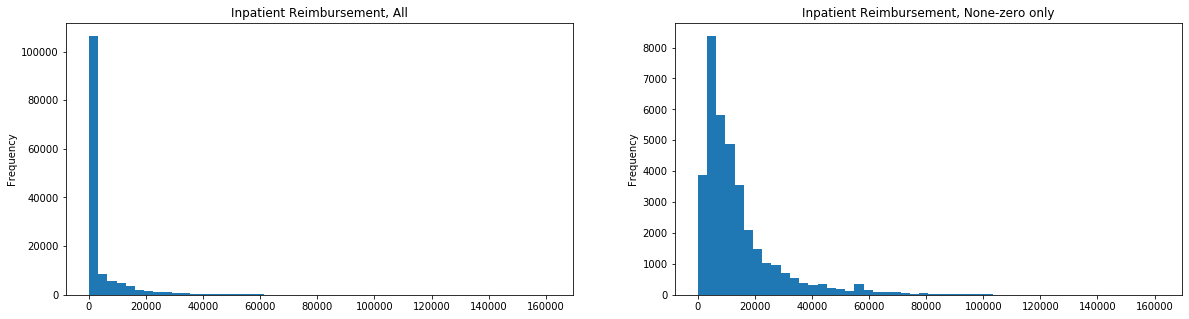

In [86]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
bene_tr['IPAnnualReimbursementAmt'].plot.hist(bins=50)
plt.title("Inpatient Reimbursement, All")
plt.subplot(1,2,2)
bene_tr['IPAnnualReimbursementAmt'][bene_tr['IPAnnualReimbursementAmt']>0].plot.hist(bins=50)
plt.title("Inpatient Reimbursement, None-zero only")

Text(0.5, 1.0, 'Outpatient Reimbursement, <$13000 only')

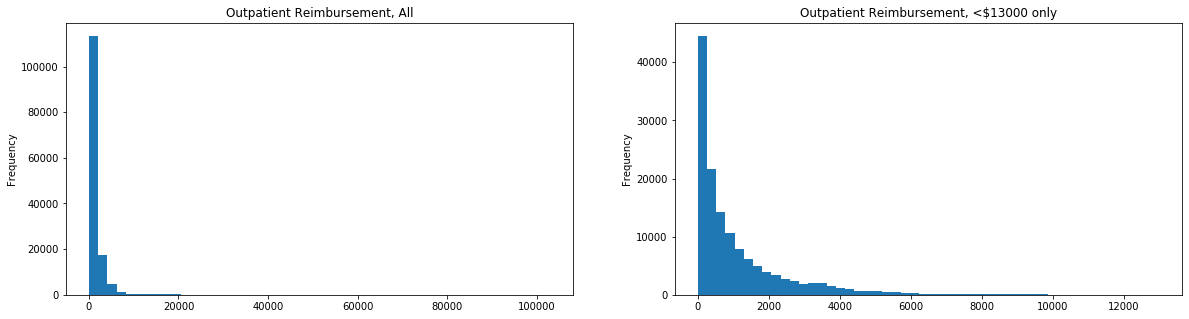

In [87]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
bene_tr['OPAnnualReimbursementAmt'].plot.hist(bins=50)
plt.title("Outpatient Reimbursement, All")
plt.subplot(1,2,2)
bene_tr['OPAnnualReimbursementAmt'][bene_tr['OPAnnualReimbursementAmt']<13000].plot.hist(bins=50)
plt.title("Outpatient Reimbursement, <$13000 only")

<h5> 4b. Relationship between the reimbursement and gender
    
    Finding: No significant difference observed between men and women.

Text(0.5, 1.0, 'Outpatient Reimbursement by Gender')

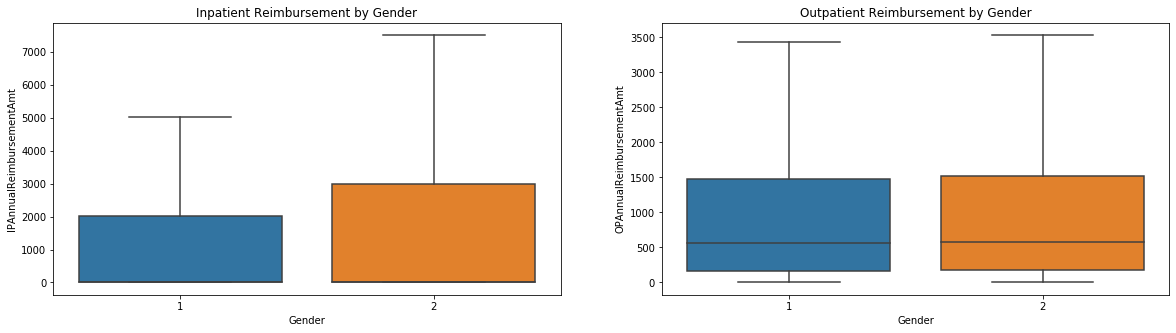

In [88]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="Gender",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Gender")
plt.subplot(1,2,2)
sns.boxplot(x="Gender",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Gender")

<h5> 4c. Relationship between the reimbursement and race
    
    Findings: No significant difference observed across racial groups for outpatient claims. 
    Groups 3 and 5 have almost no inpatient claim. 

Text(0.5, 1.0, 'Outpatient Reimbursement by Race')

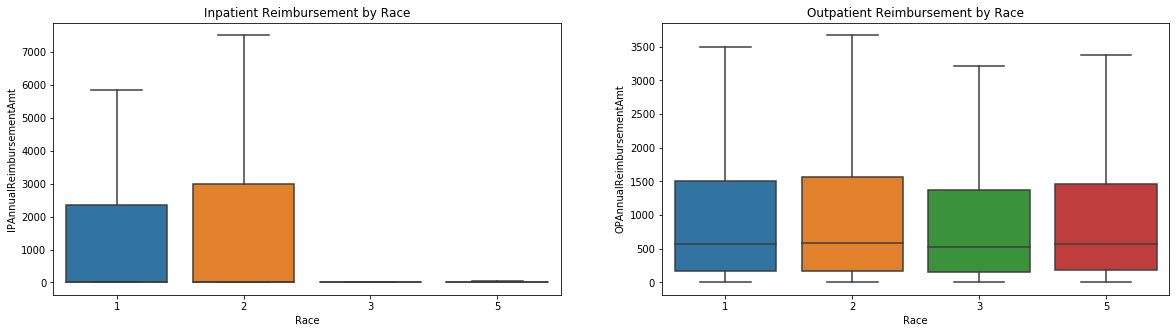

In [104]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="Race",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Race")
plt.subplot(1,2,2)
sns.boxplot(x="Race",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Race")

<h5> 4d. Relationship between the reimbursement and co-morbidity
    
    Finding: people with comobidity conditions incur almost all inpatient claims.
    They tend to have higher outpatient claim amounts. 

Text(0.5, 1.0, 'Outpatient Reimbursement by Alzheimer')

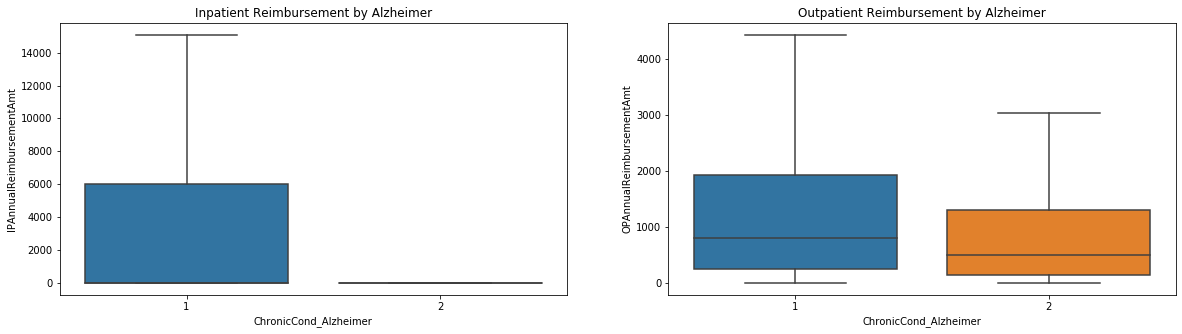

In [90]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_Alzheimer",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Alzheimer")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_Alzheimer",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Alzheimer")

Text(0.5, 1.0, 'Outpatient Reimbursement by Heart Failure')

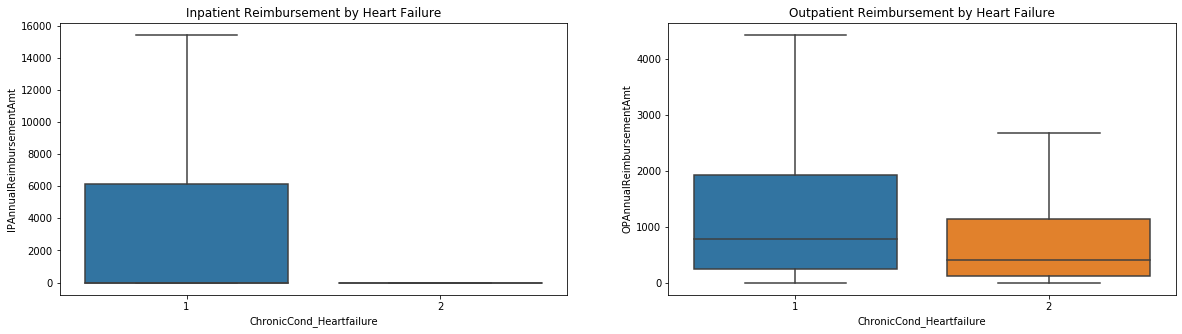

In [91]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_Heartfailure",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Heart Failure")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_Heartfailure",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Heart Failure")

Text(0.5, 1.0, 'Outpatient Reimbursement by Kidney Disease')

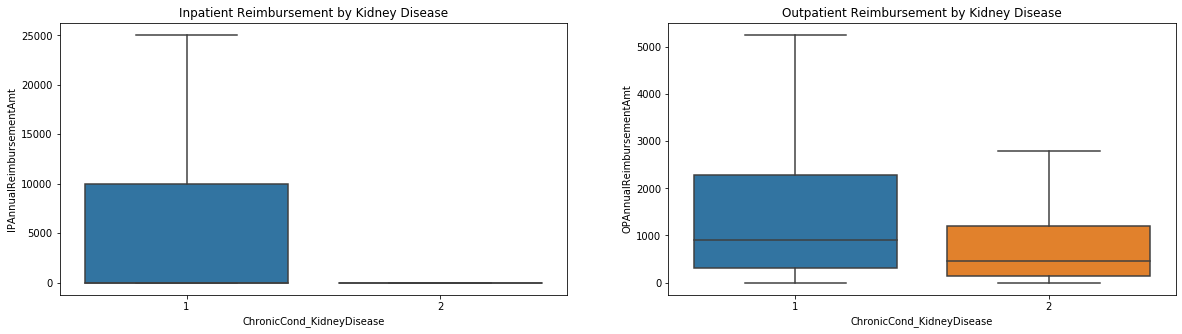

In [92]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_KidneyDisease",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Kidney Disease")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_KidneyDisease",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Kidney Disease")

Text(0.5, 1.0, 'Outpatient Reimbursement by Cancer')

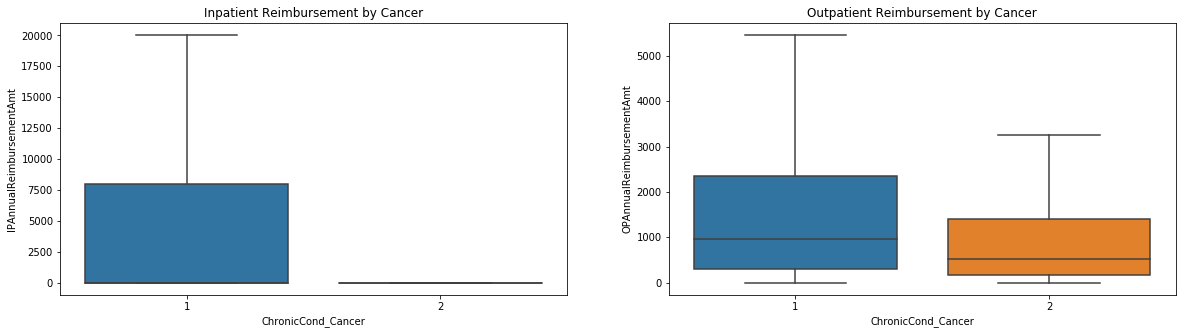

In [93]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_Cancer",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Cancer")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_Cancer",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Cancer")

Text(0.5, 1.0, 'Outpatient Reimbursement by ObstrPulmonary')

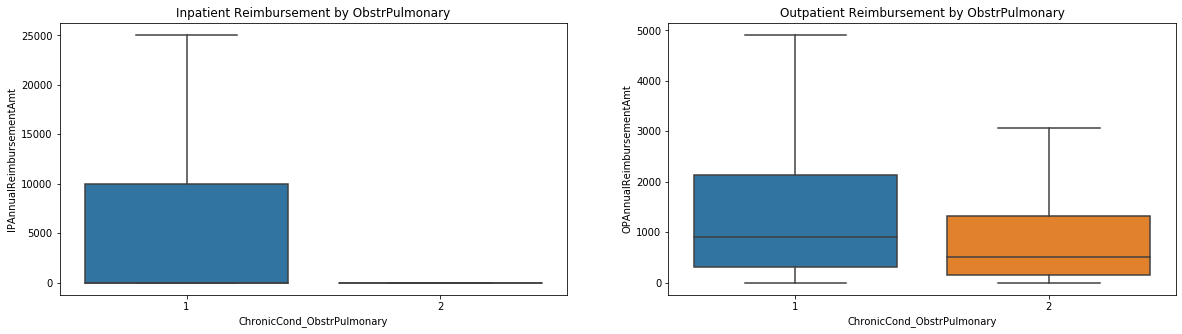

In [94]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_ObstrPulmonary",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by ObstrPulmonary")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_ObstrPulmonary",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by ObstrPulmonary")

Text(0.5, 1.0, 'Outpatient Reimbursement by Depression')

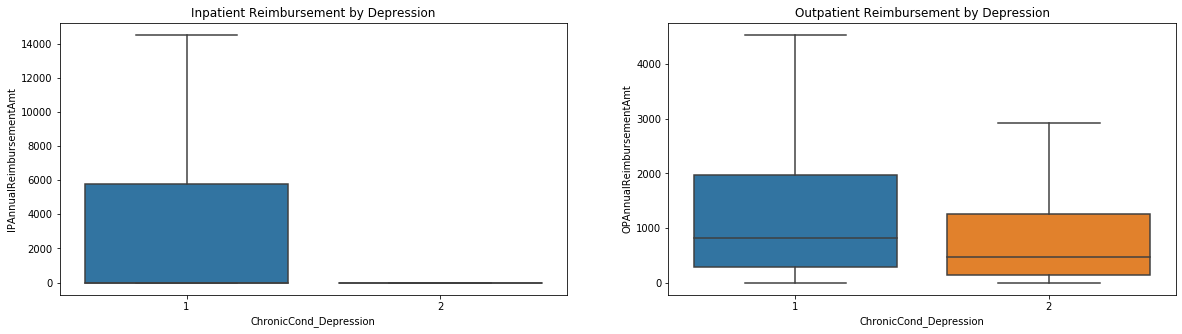

In [95]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_Depression",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Depression")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_Depression",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Depression")

Text(0.5, 1.0, 'Outpatient Reimbursement by Diabetes')

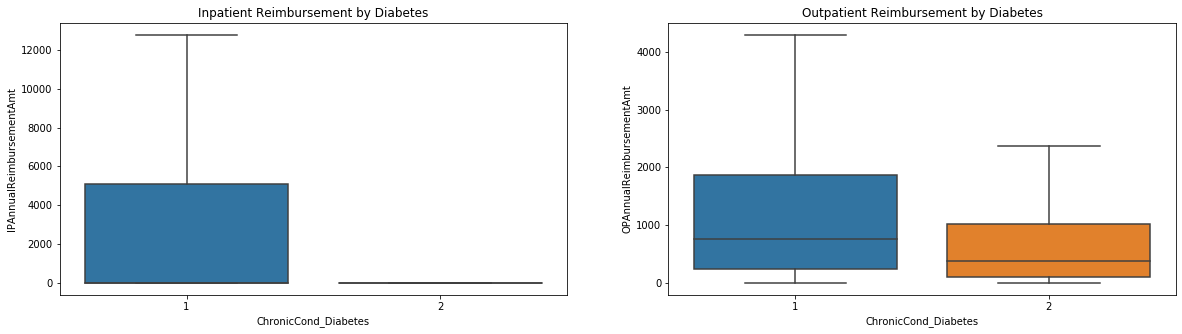

In [96]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_Diabetes",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Diabetes")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_Diabetes",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Diabetes")

Text(0.5, 1.0, 'Outpatient Reimbursement by IschemicHeart')

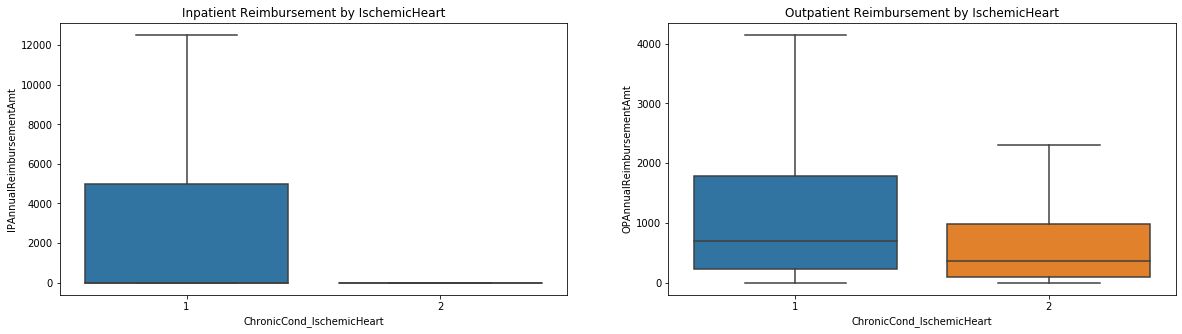

In [97]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_IschemicHeart",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by IschemicHeart")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_IschemicHeart",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by IschemicHeart")

Text(0.5, 1.0, 'Outpatient Reimbursement by Osteoporasis')

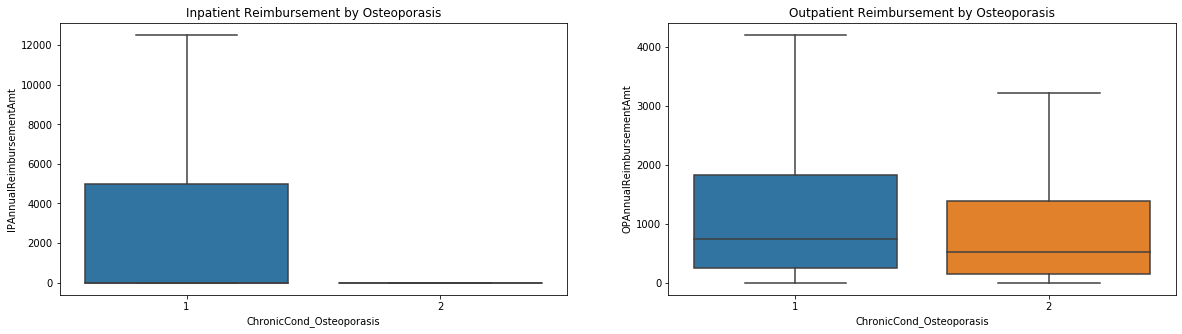

In [98]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_Osteoporasis",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Osteoporasis")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_Osteoporasis",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Osteoporasis")

Text(0.5, 1.0, 'Outpatient Reimbursement by Rheumatoidarthritis')

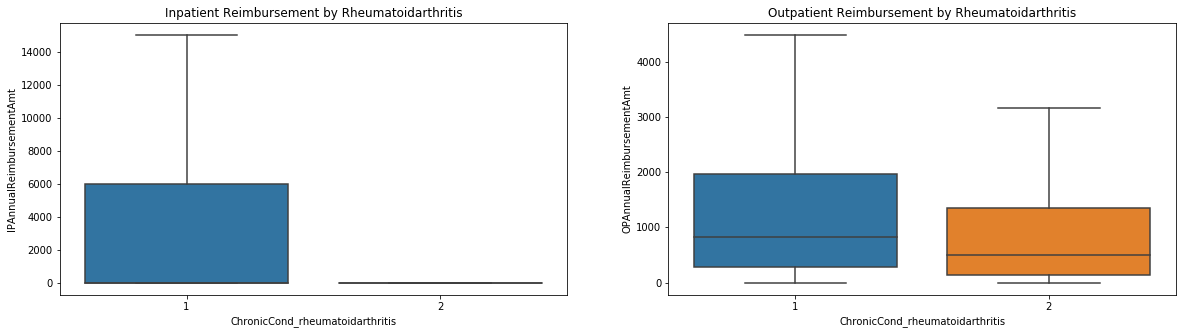

In [100]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_rheumatoidarthritis",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Rheumatoidarthritis")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_rheumatoidarthritis",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Rheumatoidarthritis")

Text(0.5, 1.0, 'Outpatient Reimbursement by Stroke')

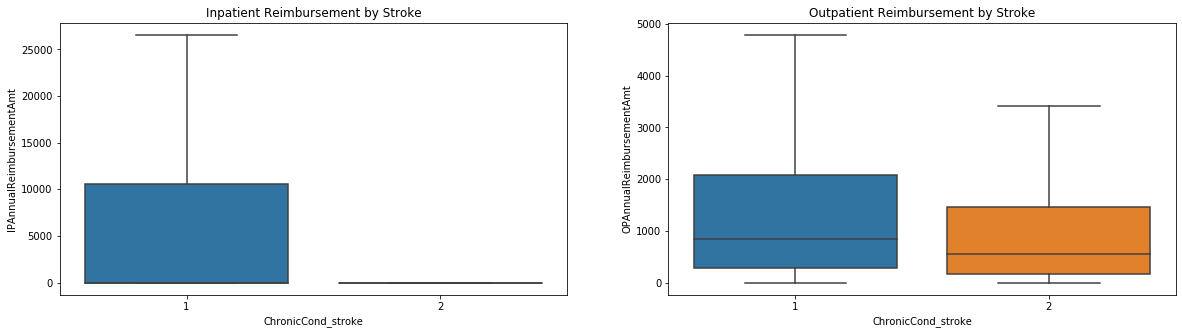

In [102]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="ChronicCond_stroke",y="IPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Inpatient Reimbursement by Stroke")
plt.subplot(1,2,2)
sns.boxplot(x="ChronicCond_stroke",y="OPAnnualReimbursementAmt",data=bene_tr,showfliers=False)
plt.title("Outpatient Reimbursement by Stroke")

<h4>4e. Merge datasets to create a Provider dataset
    
1. To calculate the number of claims and the amount of reimbursements each provider has from either inpatient or outpatient claim datasets <br>
2. Merge the above to the provider datasets with the indicator for fraud. <br>
3. Graph the number of claims and the amount of reimbursements by fraud status. 

In [145]:
In_Provider=pd.DataFrame([inpatient_tr['Provider'].value_counts().index,inpatient_tr['Provider'].value_counts()]).transpose().rename({0:'Provider',1:'Inpatient_Claim_Number'},axis=1)
In_Provider

Provider Inpatient_Claim_Number
0     PRV52019                    516
1     PRV55462                    386
2     PRV54367                    322
3     PRV53706                    282
4     PRV55209                    275
...        ...                    ...
2087  PRV55067                      1
2088  PRV57560                      1
2089  PRV55143                      1
2090  PRV53240                      1
2091  PRV52518                      1

[2092 rows x 2 columns]

In [146]:
Out_Provider=pd.DataFrame([outpatient_tr['Provider'].value_counts().index,outpatient_tr['Provider'].value_counts()]).transpose().rename({0:'Provider',1:'Outpatient_Claim_Number'},axis=1)
Out_Provider

Provider Outpatient_Claim_Number
0     PRV51459                    8240
1     PRV53797                    4739
2     PRV51574                    4444
3     PRV53918                    3588
4     PRV54895                    3433
...        ...                     ...
5007  PRV57738                       1
5008  PRV51577                       1
5009  PRV55787                       1
5010  PRV53228                       1
5011  PRV52651                       1

[5012 rows x 2 columns]

In [147]:
provider_claimnumber=pd.merge(In_Provider,Out_Provider,on='Provider',how='outer')

In [148]:
inreimburse_by_provider=inpatient_tr.groupby('Provider')['InscClaimAmtReimbursed'].sum()
inreimburse_temp1=pd.DataFrame([inreimburse_by_provider.index,inreimburse_by_provider])
inreimburse_temp2=inreimburse_temp1.transpose()
In_Provider_Claim=inreimburse_temp2.rename({0:'Provider',1:'Inpatient_Claim_Amount'},axis=1)
In_Provider_Claim

Provider Inpatient_Claim_Amount
0     PRV51001                  97000
1     PRV51003                 573000
2     PRV51007                  19000
3     PRV51008                  25000
4     PRV51011                   5000
...        ...                    ...
2087  PRV57719                  76000
2088  PRV57728                   6000
2089  PRV57729                 107000
2090  PRV57732                  76000
2091  PRV57757                 109000

[2092 rows x 2 columns]

In [149]:
outreimburse_by_provider=outpatient_tr.groupby('Provider')['InscClaimAmtReimbursed'].sum()
outreimburse_temp1=pd.DataFrame([outreimburse_by_provider.index,outreimburse_by_provider])
outreimburse_temp2=outreimburse_temp1.transpose()
Out_Provider_Claim=outreimburse_temp2.rename({0:'Provider',1:'Outpatient_Claim_Amount'},axis=1)
Out_Provider_Claim

Provider Outpatient_Claim_Amount
0     PRV51001                    7640
1     PRV51003                   32670
2     PRV51004                   52170
3     PRV51005                  280910
4     PRV51007                   14710
...        ...                     ...
5007  PRV57759                   10640
5008  PRV57760                    4770
5009  PRV57761                   18470
5010  PRV57762                    1900
5011  PRV57763                   43610

[5012 rows x 2 columns]

In [150]:
provider_claimamount=pd.merge(In_Provider_Claim,Out_Provider_Claim,on='Provider',how='outer')
provider_claimamount

Provider Inpatient_Claim_Amount Outpatient_Claim_Amount
0     PRV51001                  97000                    7640
1     PRV51003                 573000                   32670
2     PRV51007                  19000                   14710
3     PRV51008                  25000                   10630
4     PRV51011                   5000                   11630
...        ...                    ...                     ...
5405  PRV57759                    NaN                   10640
5406  PRV57760                    NaN                    4770
5407  PRV57761                    NaN                   18470
5408  PRV57762                    NaN                    1900
5409  PRV57763                    NaN                   43610

[5410 rows x 3 columns]

In [151]:
provider_list1=pd.merge(fraud_tr,provider_claimnumber,on='Provider',how='outer')
provider_list1
provider_list2=pd.merge(provider_list1,provider_claimamount,on='Provider',how='outer')
provider_list2

Provider PotentialFraud Inpatient_Claim_Number Outpatient_Claim_Number  \
0     PRV51001             No                      5                      20   
1     PRV51003            Yes                     62                      70   
2     PRV51004             No                    NaN                     149   
3     PRV51005            Yes                    NaN                    1165   
4     PRV51007             No                      3                      69   
...        ...            ...                    ...                     ...   
5405  PRV57759             No                    NaN                      28   
5406  PRV57760             No                    NaN                      22   
5407  PRV57761             No                    NaN                      82   
5408  PRV57762             No                    NaN                       1   
5409  PRV57763             No                    NaN                     118   

     Inpatient_Claim_Amount Outpatient_Claim_Amount  
0                     97000                    7640  
1                    573000                   32670  
2                       NaN                   52170  
3                       NaN                  280910  
4                     19000                   14710  
...                     ...                     ...  
5405                    NaN                   10640  
5406                    NaN                    4770  
5407                    NaN                   18470  
5408                    NaN                    1900  
5409                    NaN                   43610  

[5410 rows x 6 columns]

In [153]:
#provider_final=provider_list2.fillna(0)
provider_final=provider_list2

Findings: The potentially fraudulent providers had substantially more claims submitted and had been reimbursed substantially more. However, the per claim reimbursement is similar between the two groups of providers. 

Text(0.5, 1.0, 'Number of Outpatient Claims')

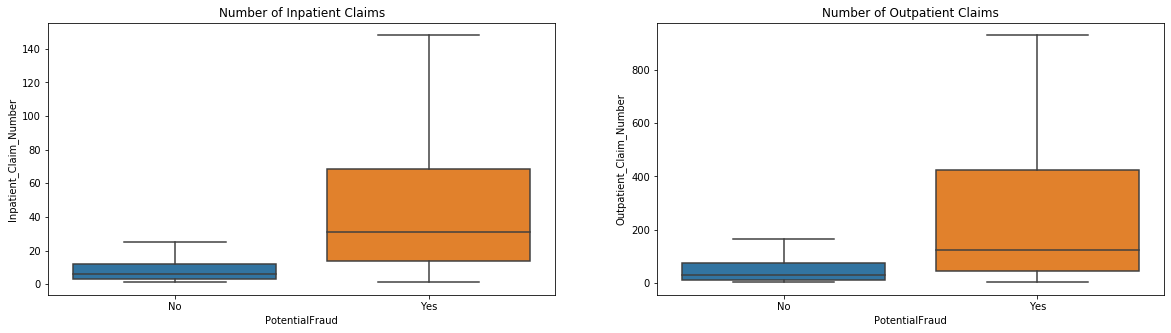

In [154]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="PotentialFraud",y="Inpatient_Claim_Number",data=provider_final,showfliers=False)
plt.title("Number of Inpatient Claims")
plt.subplot(1,2,2)
sns.boxplot(x="PotentialFraud",y="Outpatient_Claim_Number",data=provider_final,showfliers=False)
plt.title("Number of Outpatient Claims")

Text(0.5, 1.0, 'Amount of Outpatient Claims')

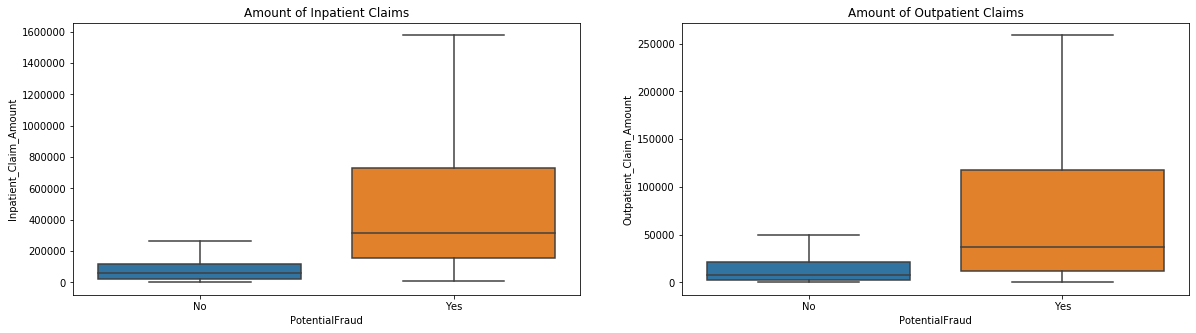

In [155]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="PotentialFraud",y="Inpatient_Claim_Amount",data=provider_final,showfliers=False)
plt.title("Amount of Inpatient Claims")
plt.subplot(1,2,2)
sns.boxplot(x="PotentialFraud",y="Outpatient_Claim_Amount",data=provider_final,showfliers=False)
plt.title("Amount of Outpatient Claims")

In [156]:
provider_list2['Inpatient_Perclaim_Amount']=provider_list2['Inpatient_Claim_Amount']/provider_list2['Inpatient_Claim_Number']

In [157]:
provider_list2['Outpatient_Perclaim_Amount']=provider_list2['Outpatient_Claim_Amount']/provider_list2['Outpatient_Claim_Number']

In [158]:
provider_list2

Provider PotentialFraud Inpatient_Claim_Number Outpatient_Claim_Number  \
0     PRV51001             No                      5                      20   
1     PRV51003            Yes                     62                      70   
2     PRV51004             No                    NaN                     149   
3     PRV51005            Yes                    NaN                    1165   
4     PRV51007             No                      3                      69   
...        ...            ...                    ...                     ...   
5405  PRV57759             No                    NaN                      28   
5406  PRV57760             No                    NaN                      22   
5407  PRV57761             No                    NaN                      82   
5408  PRV57762             No                    NaN                       1   
5409  PRV57763             No                    NaN                     118   

     Inpatient_Claim_Amount Outpatient_Claim_Amount Inpatient_Perclaim_Amount  \
0                     97000                    7640                     19400   
1                    573000                   32670                   9241.94   
2                       NaN                   52170                       NaN   
3                       NaN                  280910                       NaN   
4                     19000                   14710                   6333.33   
...                     ...                     ...                       ...   
5405                    NaN                   10640                       NaN   
5406                    NaN                    4770                       NaN   
5407                    NaN                   18470                       NaN   
5408                    NaN                    1900                       NaN   
5409                    NaN                   43610                       NaN   

     Outpatient_Perclaim_Amount  
0                           382  
1                       466.714  
2                       350.134  
3                       241.124  
4                       213.188  
...                         ...  
5405                        380  
5406                    216.818  
5407                    225.244  
5408                       1900  
5409                    369.576  

[5410 rows x 8 columns]

Text(0.5, 1.0, 'Outpatient Amount Per Claim')

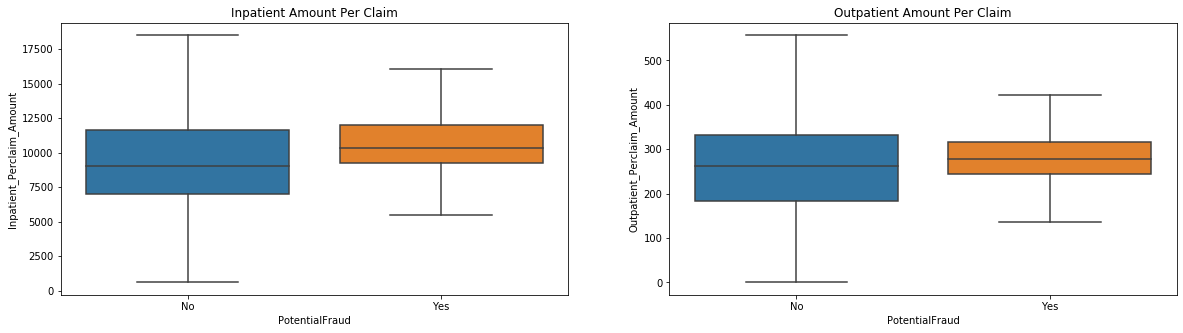

In [159]:
f,axs=plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="PotentialFraud",y="Inpatient_Perclaim_Amount",data=provider_list2,showfliers=False)
plt.title("Inpatient Amount Per Claim")
plt.subplot(1,2,2)
sns.boxplot(x="PotentialFraud",y="Outpatient_Perclaim_Amount",data=provider_list2,showfliers=False)
plt.title("Outpatient Amount Per Claim")